In [1]:
#Ignorando los warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Se importa las funciones personalizadas
import sys
sys.path.append('..\\utils')

## 1. Importando las librerías

In [3]:
import pandas as pd
import numpy as np

from utils import metodo_silueta

from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

## 2. Leyendo los datos

In [4]:
dataset = pd.read_csv("..\datos_procesados\Mall_Customers_procesado.csv", sep=";")
dataset

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


## 3. Realizando el escalimiento de los datos

In [5]:
esc = RobustScaler()
#esc = MinMaxScaler() 
dataset_esc = pd.DataFrame(
    esc.fit_transform(dataset),
    columns=dataset.columns.to_list()
)
dataset_esc

,Age,Annual Income (k$),Spending Score (1-100)
0,-0.839506,-1.273973,-0.287582
1,-0.740741,-1.273973,0.810458
2,-0.790123,-1.246575,-1.150327
3,-0.641975,-1.246575,0.705882
4,-0.246914,-1.219178,-0.261438
...,...,...,...
195,-0.049383,1.602740,0.758170
196,0.444444,1.767123,-0.575163
197,-0.197531,1.767123,0.627451
198,-0.197531,2.068493,-0.836601


## 4. Se ejecuta el método del análisis de siluetas

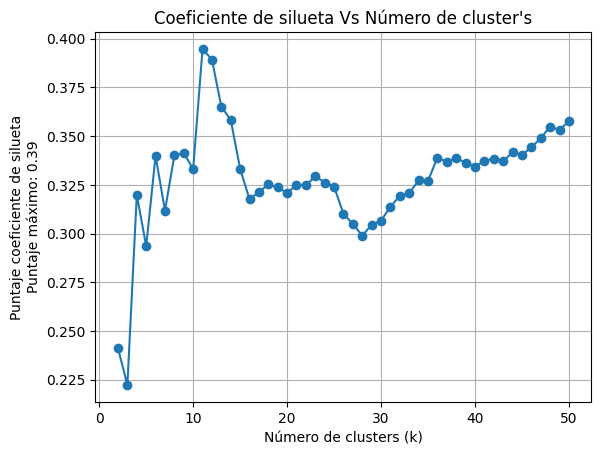

In [14]:
%matplotlib inline
metodo_silueta(n_grupos=50, dataset=dataset_esc, agrupamiento='aglomerativo')

Según el análisis del método de siluetas, el número de grupos más optimo es 11

## 5. Aplicando PCA para reducir el número de variables

#### 5.1 Aplicando PCA a todos los componentes para verificar que tan bien captura la varianza de todos los datos

Suma acumulada de la varianza explicada:
[ 42.71618592  78.39878627 100.        ]


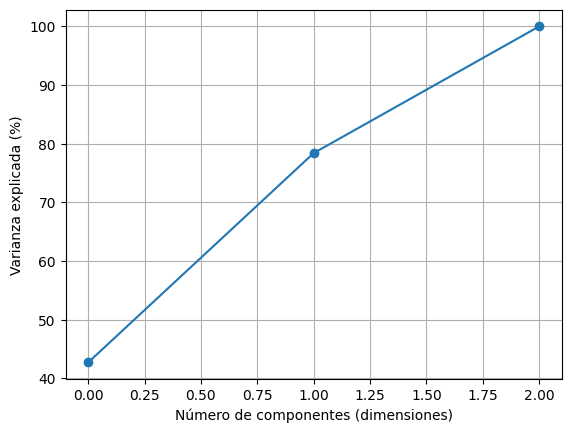

In [15]:
pca = PCA(n_components=None)
pca.fit(dataset_esc)

#Mostrando la suma acumulada del ratio de la varianza explicada
print('Suma acumulada de la varianza explicada:')
print(np.cumsum(pca.explained_variance_ratio_*100))

#Creando un plot para mostrar el impacto de la cantidad de componentes
%matplotlib inline
plt.plot(np.cumsum(pca.explained_variance_ratio_*100), marker='o')

plt.xlabel("Número de componentes (dimensiones)")
plt.ylabel("Varianza explicada (%)")
plt.grid()
plt.show()

#### 5.2 Eligiendo PCA con 2 componentes

In [17]:
pca_2 = PCA(n_components=2)
columnas = ['PCA {}'.format(i) for i in range(2)]
dataset_pca_2 = pd.DataFrame(pca_2.fit_transform(dataset_esc), columns=columnas)
dataset_pca_2

,PCA 0,PCA 1
0,-0.418516,-1.281003
1,-1.094771,-1.335877
2,0.203167,-1.203770
3,-0.953720,-1.297542
4,-0.009149,-1.196066
...,...,...
195,-0.776065,1.572269
196,0.479299,1.835672
197,-0.807425,1.735398
198,0.167041,2.116100


#### 5.3 El método de análisis de siluetas con dos componentes

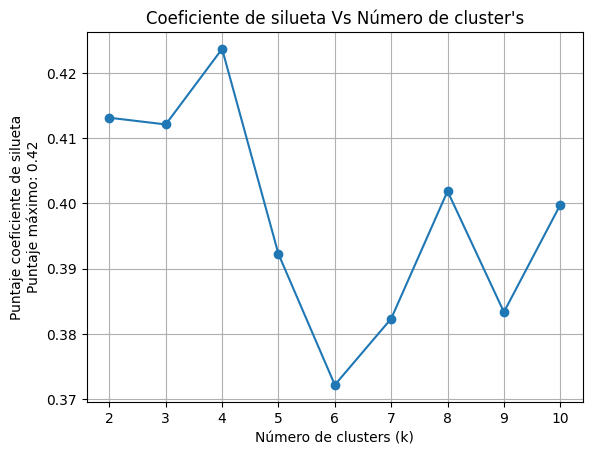

In [20]:
metodo_silueta(n_grupos=10, dataset=dataset_pca_2)

El metodo de análisis de siluetas nos indica que el número optimo de componentes es 4

#### 5.4 Eligiendo cuatro grupos para realizar el agrupamiento aglomerativo

In [25]:
#Se agrupan los datos en cuatro grupos
ac = AgglomerativeClustering(
    n_clusters=4,
    metric='euclidean',
    linkage='complete'
)

y_ac = ac.fit_predict(dataset_pca_2)

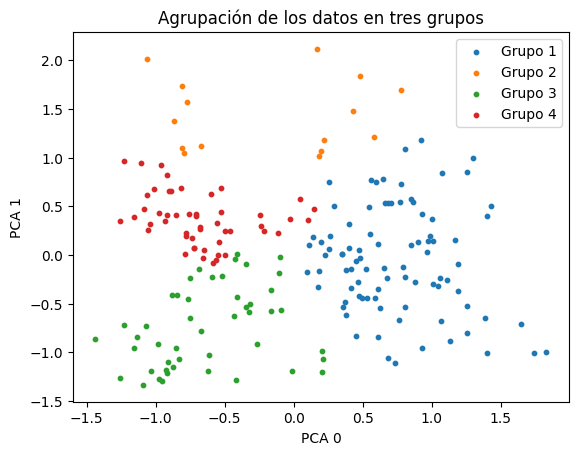

In [26]:
#Graficando los datos en 2D
grupo_0 = dataset_pca_2[y_ac==0]
grupo_1 = dataset_pca_2[y_ac==1]
grupo_2 = dataset_pca_2[y_ac==2]
grupo_3 = dataset_pca_2[y_ac==3]

plt.scatter(x=grupo_0['PCA 0'], y=grupo_0['PCA 1'], label='Grupo 1', s=10)
plt.scatter(x=grupo_1['PCA 0'], y=grupo_1['PCA 1'], label='Grupo 2', s=10)
plt.scatter(x=grupo_2['PCA 0'], y=grupo_2['PCA 1'], label='Grupo 3', s=10)
plt.scatter(x=grupo_3['PCA 0'], y=grupo_3['PCA 1'], label='Grupo 4', s=10)
plt.title('Agrupación de los datos en tres grupos')
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')
plt.legend()
plt.show()

## 6. Creando el dataset final con los datos agrupados

In [27]:
dataset_final = dataset.copy(deep=True)
dataset_final['grupos'] = y_ac
dataset_final

,Age,Annual Income (k$),Spending Score (1-100),grupos
0,19,15,39,2
1,21,15,81,2
2,20,16,6,2
3,23,16,77,2
4,31,17,40,2
...,...,...,...,...
195,35,120,79,1
196,45,126,28,1
197,32,126,74,1
198,32,137,18,1
